# **Question 1**
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
H0='There is no significant difference in the diameter of the cutlet between two units.'
H1='There is a significant difference in the diameter of the cutlet between two units.'

In [ ]:
df=pd.read_csv('/content/Cutlets.csv')
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [ ]:
unitA=pd.Series(df.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [ ]:
unitB=pd.Series(df.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

<Axes: >

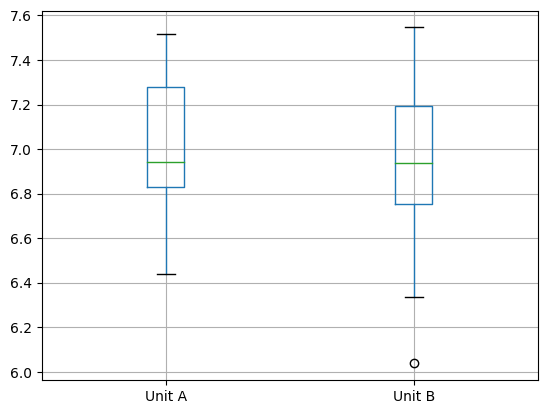

In [ ]:
df.boxplot()

In [ ]:
p_value=stats.ttest_ind(unitA,unitB)[1]
p_value

0.4722394724599501

In [ ]:
if p_value<0.05:
  print('Reject H0 : ',H1)
else:
  print('Failed to reject H0 : ',H0)

Failed to reject H0 :  There is no significant difference in the diameter of the cutlet between two units.


# **Question 2**
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


### Ans--> Here we going to conduct anova test

In [ ]:
lab_df=pd.read_csv('/content/LabTAT.csv')

In [ ]:
lab_df

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [ ]:
lab_df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [ ]:
# checking for duplicate values
lab_df.duplicated().value_counts()

False    120
dtype: int64

In [ ]:
# checking for not available values
lab_df.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

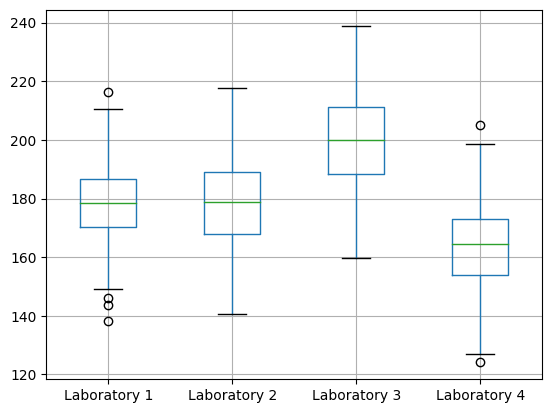

In [ ]:
# checking for outliers
lab_df.boxplot()

Outliers are present in Laboratory 1 and Laboratory 4

In [ ]:
def outliers_detect(data,column):
  q3=data[column].quantile(0.75)
  q1=data[column].quantile(0.25)
  iqr=q3-q1
  lower_extreme=q1-(1.5*iqr)
  upper_extreme=q3+(1.5*iqr)
  return lower_extreme,upper_extreme

In [ ]:
low_ex,upp_ex=outliers_detect(lab_df,'Laboratory 1')

In [ ]:
lab_df[lab_df['Laboratory 1']>210.83 ]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
48,216.39,193.28,177.76,161.42


In [ ]:
lab_df[lab_df['Laboratory 1']<146.03]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
66,138.30,176.63,193.08,128.93
72,143.52,168.20,213.18,124.06
114,145.89,175.16,203.39,139.34


In [ ]:
H0= 'mean(lab1)=mean(lab2)=mean(lab3)=mean(lab4).'
H1='Atleast one lab mean is different.'

In [ ]:
# performing anova
test_stat,p_value=stats.f_oneway(lab_df.iloc[:,0],lab_df.iloc[:,1],lab_df.iloc[:,2],lab_df.iloc[:,3])
p_value

2.1156708949992414e-57

In [ ]:
if p_value<0.05:
  print('Reject null hypothesis : ',H1)
else:
  print('Failed to reject null hypothesis : ',H0)

Reject null hypothesis :  Atleast one lab mean is different.


# *# Question 3*

 Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


In [ ]:
df_buy=pd.read_csv('/content/BuyerRatio.csv')

In [ ]:
df_buy

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [ ]:
# conducting chi-square test
H0='There is no dependency in male and female.'
H1='There is a dependency in male and female.'

In [ ]:
buyer=df_buy.iloc[:,1:]
buyer

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [ ]:
p_value=stats.chi2_contingency(buyer)[1]
p_value

0.6603094907091882

In [ ]:
if p_value<0.05:
  print('Reject null hypothesis : ',H1)
else:
  print('Failed to reject null hypothesis : ',H0)

Failed to reject null hypothesis :  There is no dependency in male and female.


# **Question 4**
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


### We have to perform chi-square test

In [ ]:
df_cus=pd.read_csv('/content/Costomer+OrderForm.csv')
df_cus

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [ ]:
df_cus.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [ ]:
df_cus.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [ ]:
df_cus.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [ ]:
df_cus.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [ ]:
H0='Independence of categorical variables (customer order forms defective % does not varies by centre).'
H1='Dependence of categorical variables (customer order forms defective % varies by centre).'

In [ ]:
# observed values
obs=[[ 271,267,269,280],
     [29,33,31,20]]

In [ ]:
obs

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [ ]:
p_value=stats.chi2_contingency(obs)[1]
p_value

0.2771020991233135

In [ ]:
if p_value<0.05:
  print('Reject null hypothesis : ',H1)
else:
  print('Failed to reject null hypothesis : ',H0)

Failed to reject null hypothesis :  Independence of categorical variables (customer order forms defective % does not varies by centre).
